# Train simple baseline models merged seasons (full) data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from src.features.data_engineering import preprocess_seasons_data, reverse_processing

In [2]:
(x_train, y_train), (x_test, y_test), (x_train_target, x_test_target), x_scaler = preprocess_seasons_data()

## Train on baseline Dummy model

In [3]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

In [4]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(x_train, y_train)

DummyRegressor()

In [5]:
y_pred = dummy_regr.predict(x_test)

In [6]:
mean_squared_error(y_pred, y_test)

6.2045750740819905

## Train on baseline decision tree model

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
tree_regr = DecisionTreeRegressor()
tree_regr.fit(x_train, y_train)

DecisionTreeRegressor()

In [9]:
y_pred = tree_regr.predict(x_test)

In [10]:
mean_squared_error(y_pred, y_test)

9.503787569699696

Feature 0: assists, Score: 0.00278
Feature 1: bonus, Score: 0.00374
Feature 2: bps, Score: 0.03948
Feature 3: clean_sheets, Score: 0.00243
Feature 4: creativity, Score: 0.05595
Feature 5: goals_conceded, Score: 0.01584
Feature 6: goals_scored, Score: 0.00137
Feature 7: ict_index, Score: 0.04517
Feature 8: influence, Score: 0.04957
Feature 9: minutes, Score: 0.23762
Feature 10: own_goals, Score: 0.00047
Feature 11: penalties_missed, Score: 0.00054
Feature 12: penalties_saved, Score: 0.00024
Feature 13: red_cards, Score: 0.00045
Feature 14: saves, Score: 0.0016
Feature 15: selected, Score: 0.13115
Feature 16: threat, Score: 0.03534
Feature 17: total_points, Score: 0.0168
Feature 18: transfers_balance, Score: 0.07798
Feature 19: transfers_in, Score: 0.09327
Feature 20: transfers_out, Score: 0.08229
Feature 21: value, Score: 0.07302
Feature 22: was_home, Score: 0.01133
Feature 23: yellow_cards, Score: 0.00419
Feature 24: position_DEF, Score: 0.00589
Feature 25: position_FWD, Score: 0.00358

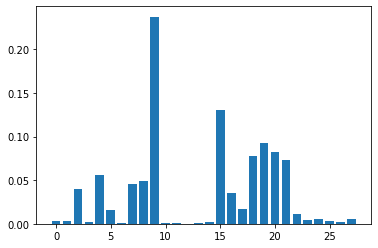

In [11]:
# summarize feature importance
importance = tree_regr.feature_importances_
for i,v in enumerate(importance):
    print(f'Feature {i}: {x_train.columns[i]}, Score: {round(v,5)}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Train on baseline SVR model

In [12]:
from sklearn.svm import LinearSVR

For single season data at first I used SVR as the model, but because of it's time complexity for bigger data, now I use LinearSVR.

In [13]:
model_svr = LinearSVR()
model_svr.fit(x_train, y_train)

d:\studies\informatyka\semestr_3\fpl_ai_manager\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [15]:
# create series to keep indexes and name same as in the original y data
y_pred_svr = pd.Series(model_svr.predict(x_test), index=y_test.index, name='predicted_total_points_next_gameweek')

In [16]:
mean_squared_error(y_pred_svr, y_test)

5.2130112423658845

## Merge results with footballers extracted target data

In [17]:
x_test_reversed = reverse_processing(x_test, x_scaler, x_test_target)

In [18]:
predictions_svr = pd.concat([y_pred_svr, x_test_reversed], axis=1)

In [19]:
#preview predictions_svr sorted by predicted total points descending
predictions_svr.sort_values(by='predicted_total_points_next_gameweek', ascending=False).head(10)

,predicted_total_points_next_gameweek,name,GW,element,total_points_next_gameweek,season,assists,bonus,bps,clean_sheets,...,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,position_DEF,position_FWD,position_GK,position_MID
95003,3.218087,Bruno Miguel Borges Fernandes,9,302,10.0,2020-21,0.0,3.0,44.0,1.0,...,1033358.0,1055501.0,22143.0,107.0,1.0,0.0,0.0,0.0,0.0,1.0
124386,3.138493,Bernardo Mota Veiga de Carvalho e Silva,16,261,1.0,2021-22,1.0,0.0,17.0,1.0,...,983926.0,993639.0,9713.0,76.0,1.0,0.0,0.0,0.0,0.0,1.0
92785,2.918156,Harry Kane,5,388,5.0,2020-21,1.0,3.0,69.0,0.0,...,723621.0,769600.0,45979.0,106.0,1.0,0.0,0.0,1.0,0.0,0.0
70011,2.900592,Teemu_Pukki_278,4,278,12.0,2019-20,0.0,0.0,5.0,0.0,...,984950.0,1013156.0,28206.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0
92826,2.855418,James RodrÃ­guez,5,508,2.0,2020-21,1.0,0.0,22.0,0.0,...,735240.0,817940.0,82700.0,79.0,1.0,1.0,0.0,0.0,0.0,1.0
93416,2.851311,Heung-Min Son,6,390,2.0,2020-21,0.0,3.0,30.0,1.0,...,746754.0,764606.0,17852.0,94.0,0.0,0.0,0.0,0.0,0.0,1.0
116779,2.840189,Demarai Gray,4,484,2.0,2021-22,0.0,0.0,25.0,0.0,...,614701.0,802662.0,187961.0,56.0,1.0,0.0,0.0,0.0,0.0,1.0
56967,2.838132,Paul_Pogba_302,20,302,3.0,2018-19,1.0,3.0,66.0,0.0,...,420835.0,427541.0,6706.0,81.0,1.0,0.0,0.0,0.0,0.0,1.0
117598,2.830637,Romelu Lukaku,5,529,2.0,2021-22,0.0,0.0,11.0,1.0,...,686333.0,788504.0,102171.0,116.0,0.0,0.0,0.0,1.0,0.0,0.0
101534,2.800470,Raheem Sterling,20,276,0.0,2020-21,1.0,0.0,38.0,1.0,...,417851.0,452070.0,34219.0,115.0,0.0,0.0,0.0,0.0,0.0,1.0


## Train on baseline Multi-layer Perceptron model

In [20]:
import tensorflow as tf

In [21]:
model_mlp = tf.keras.models.Sequential()

model_mlp.add(tf.keras.layers.Dense(units=32, activation='relu', input_shape=(x_train.shape[1],)))
model_mlp.add(tf.keras.layers.Dense(units=16, activation='relu'))
model_mlp.add(tf.keras.layers.Dense(units=1, activation='linear'))


In [22]:
model_mlp.compile(optimizer='adam',
                  loss='mse')

In [23]:
history = model_mlp.fit(x_train, y_train,
                        batch_size=16,
                        epochs=30,
                        validation_split=0.2)

Epoch 1/30
5182/5182 [==============================] - 4s 807us/step - loss: 4.6171 - val_loss: 4.7159
Epoch 2/30
5182/5182 [==============================] - 4s 762us/step - loss: 4.5394 - val_loss: 4.7024
Epoch 3/30
5182/5182 [==============================] - 4s 729us/step - loss: 4.5246 - val_loss: 4.6981
Epoch 4/30
5182/5182 [==============================] - 4s 727us/step - loss: 4.5149 - val_loss: 4.6821
Epoch 5/30
5182/5182 [==============================] - 4s 713us/step - loss: 4.5114 - val_loss: 4.6874
Epoch 6/30
5182/5182 [==============================] - 4s 741us/step - loss: 4.5080 - val_loss: 4.6827
Epoch 7/30
5182/5182 [==============================] - 4s 690us/step - loss: 4.5033 - val_loss: 4.6788
Epoch 8/30
5182/5182 [==============================] - 4s 724us/step - loss: 4.5038 - val_loss: 4.6898
Epoch 9/30
5182/5182 [==============================] - 3s 674us/step - loss: 4.4988 - val_loss: 4.6905
Epoch 10/30
5182/5182 [==============================] - 4s 712u

In [24]:
score = model_mlp.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score)

Test loss: 4.494966506958008


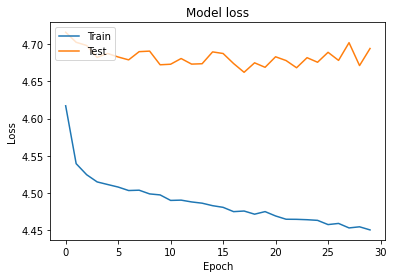

In [25]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [26]:
y_pred_mlp = pd.Series(model_mlp.predict(x_test).reshape(-1,), index=y_test.index, name='predicted_total_points_next_gameweek')

In [27]:
predictions_mlp = pd.concat([y_pred_mlp, x_test_reversed], axis=1)
#preview predictions_mlp sorted by predicted total points descending
predictions_mlp.sort_values(by='predicted_total_points_next_gameweek', ascending=False).head(10)

,predicted_total_points_next_gameweek,name,GW,element,total_points_next_gameweek,season,assists,bonus,bps,clean_sheets,...,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,position_DEF,position_FWD,position_GK,position_MID
69898,7.994510,Mohamed_Salah_191,4,191,9.0,2019-20,1.0,0.0,15.0,1.0,...,243530.0,291554.0,48024.0,125.0,0.0,0.0,0.0,0.0,0.0,1.0
59869,7.609022,Mohamed_Salah_253,25,253,8.0,2018-19,0.0,0.0,-2.0,0.0,...,-18495.0,36357.0,54852.0,136.0,0.0,0.0,0.0,0.0,0.0,1.0
126767,7.543309,Mohamed Salah,21,233,0.0,2021-22,0.0,0.0,25.0,0.0,...,-259533.0,52331.0,311864.0,129.0,0.0,0.0,0.0,0.0,0.0,1.0
99759,7.391932,Mohamed Salah,17,254,3.0,2020-21,0.0,0.0,-1.0,0.0,...,12437.0,87003.0,74566.0,126.0,0.0,0.0,0.0,0.0,0.0,1.0
70486,7.349533,Raheem_Sterling_214,5,214,0.0,2019-20,0.0,0.0,19.0,0.0,...,-53559.0,97908.0,151467.0,123.0,0.0,0.0,0.0,0.0,0.0,1.0
99247,7.330699,Mohamed Salah,16,254,2.0,2020-21,0.0,0.0,-5.0,1.0,...,79807.0,108826.0,29019.0,126.0,0.0,0.0,0.0,0.0,0.0,1.0
83427,7.314775,Mohamed_Salah_191,28,191,9.0,2019-20,0.0,0.0,5.0,0.0,...,23476.0,57735.0,34259.0,128.0,0.0,0.0,0.0,0.0,0.0,1.0
116716,7.299340,Mohamed Salah,4,233,12.0,2021-22,0.0,0.0,28.0,1.0,...,126513.0,335798.0,209285.0,125.0,0.0,0.0,0.0,0.0,0.0,1.0
79907,7.091304,Kevin_De Bruyne_215,22,215,2.0,2019-20,2.0,0.0,34.0,1.0,...,83926.0,128395.0,44469.0,106.0,0.0,0.0,0.0,0.0,0.0,1.0
101534,7.090796,Raheem Sterling,20,276,0.0,2020-21,1.0,0.0,38.0,1.0,...,417851.0,452070.0,34219.0,115.0,0.0,0.0,0.0,0.0,0.0,1.0


### Train bigger MLP model

In [28]:
model_mlp_2 = tf.keras.models.Sequential()

model_mlp_2.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(x_train.shape[1],)))
model_mlp_2.add(tf.keras.layers.Dense(units=256, activation='relu'))
model_mlp_2.add(tf.keras.layers.Dense(units=256, activation='relu'))
model_mlp_2.add(tf.keras.layers.Dense(units=126, activation='relu'))
model_mlp_2.add(tf.keras.layers.Dense(units=64, activation='relu'))
model_mlp_2.add(tf.keras.layers.Dense(units=1, activation='linear'))


In [29]:
model_mlp_2.compile(optimizer='adam',
                  loss='mse')

In [30]:
history_2 = model_mlp_2.fit(x_train, y_train,
                        batch_size=16,
                        epochs=30,
                        validation_split=0.2)

Epoch 1/30
5182/5182 [==============================] - 7s 1ms/step - loss: 4.6491 - val_loss: 4.7137
Epoch 2/30
5182/5182 [==============================] - 6s 1ms/step - loss: 4.5568 - val_loss: 4.7289
Epoch 3/30
5182/5182 [==============================] - 7s 1ms/step - loss: 4.5477 - val_loss: 4.6891
Epoch 4/30
5182/5182 [==============================] - 7s 1ms/step - loss: 4.5404 - val_loss: 4.6928
Epoch 5/30
5182/5182 [==============================] - 6s 1ms/step - loss: 4.5292 - val_loss: 4.7733
Epoch 6/30
5182/5182 [==============================] - 7s 1ms/step - loss: 4.5229 - val_loss: 4.7077
Epoch 7/30
5182/5182 [==============================] - 7s 1ms/step - loss: 4.5153 - val_loss: 4.6911
Epoch 8/30
5182/5182 [==============================] - 6s 1ms/step - loss: 4.5140 - val_loss: 4.6921
Epoch 9/30
5182/5182 [==============================] - 6s 1ms/step - loss: 4.5060 - val_loss: 4.6881
Epoch 10/30
5182/5182 [==============================] - 6s 1ms/step - loss: 4.506

In [31]:
score_2 = model_mlp_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_2)

Test loss: 4.539733409881592


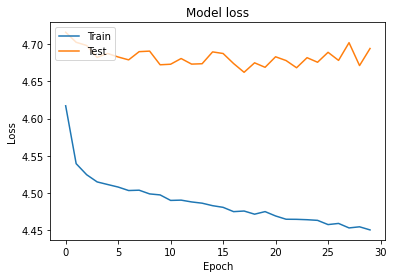

In [32]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [33]:
y_pred_mlp_2 = pd.Series(model_mlp_2.predict(x_test).reshape(-1,), index=y_test.index, name='predicted_total_points_next_gameweek')

In [34]:
predictions_mlp_2 = pd.concat([y_pred_mlp_2, x_test_reversed], axis=1)
#preview predictions_mlp_2 sorted by predicted total points descending
predictions_mlp_2.sort_values(by='predicted_total_points_next_gameweek', ascending=False).head(10)

,predicted_total_points_next_gameweek,name,GW,element,total_points_next_gameweek,season,assists,bonus,bps,clean_sheets,...,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,position_DEF,position_FWD,position_GK,position_MID
59869,10.754632,Mohamed_Salah_253,25,253,8.0,2018-19,0.0,0.0,-2.0,0.0,...,-18495.0,36357.0,54852.0,136.0,0.0,0.0,0.0,0.0,0.0,1.0
70486,10.687531,Raheem_Sterling_214,5,214,0.0,2019-20,0.0,0.0,19.0,0.0,...,-53559.0,97908.0,151467.0,123.0,0.0,0.0,0.0,0.0,0.0,1.0
69898,10.638161,Mohamed_Salah_191,4,191,9.0,2019-20,1.0,0.0,15.0,1.0,...,243530.0,291554.0,48024.0,125.0,0.0,0.0,0.0,0.0,0.0,1.0
99759,10.454197,Mohamed Salah,17,254,3.0,2020-21,0.0,0.0,-1.0,0.0,...,12437.0,87003.0,74566.0,126.0,0.0,0.0,0.0,0.0,0.0,1.0
81781,9.987192,Kevin_De Bruyne_215,25,215,14.0,2019-20,0.0,0.0,10.0,0.0,...,167175.0,213846.0,46671.0,107.0,0.0,0.0,0.0,0.0,0.0,1.0
118991,9.955945,Bruno Miguel Borges Fernandes,8,277,1.0,2021-22,1.0,0.0,24.0,0.0,...,-182100.0,24555.0,206655.0,118.0,0.0,0.0,0.0,0.0,0.0,1.0
49716,9.824412,Mohamed_Salah_253,7,253,3.0,2018-19,0.0,0.0,8.0,0.0,...,-106042.0,22128.0,128170.0,129.0,0.0,0.0,0.0,0.0,0.0,1.0
99247,9.627673,Mohamed Salah,16,254,2.0,2020-21,0.0,0.0,-5.0,1.0,...,79807.0,108826.0,29019.0,126.0,0.0,0.0,0.0,0.0,0.0,1.0
73656,9.142138,Kevin_De Bruyne_215,11,215,2.0,2019-20,0.0,0.0,21.0,0.0,...,168126.0,197239.0,29113.0,102.0,1.0,0.0,0.0,0.0,0.0,1.0
78152,9.051242,Kevin_De Bruyne_215,19,215,14.0,2019-20,1.0,0.0,21.0,0.0,...,287829.0,315524.0,27695.0,104.0,0.0,0.0,0.0,0.0,0.0,1.0


## Train on baseline XGBoost model

In [4]:
import xgboost as xgb

In [5]:
model_xgb = xgb.XGBRegressor()

In [7]:
model_xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [9]:
# create series to keep indexes and name same as in the original y data
y_pred = pd.Series(model_xgb.predict(x_test), index=y_test.index,
                        name='predicted_total_points_next_gameweek')

In [10]:
mean_squared_error(y_pred, y_test)

4.614374008179695

Feature 0: assists, Score: 0.005260000005364418
Feature 1: bonus, Score: 0.0075599998235702515
Feature 2: bps, Score: 0.00949000008404255
Feature 3: clean_sheets, Score: 0.00863999966531992
Feature 4: creativity, Score: 0.012199999764561653
Feature 5: goals_conceded, Score: 0.010219999589025974
Feature 6: goals_scored, Score: 0.006909999996423721
Feature 7: ict_index, Score: 0.03853999823331833
Feature 8: influence, Score: 0.014720000326633453
Feature 9: minutes, Score: 0.5295799970626831
Feature 10: own_goals, Score: 0.008320000022649765
Feature 11: penalties_missed, Score: 0.015359999611973763
Feature 12: penalties_saved, Score: 0.010619999840855598
Feature 13: red_cards, Score: 0.03925999999046326
Feature 14: saves, Score: 0.01336000021547079
Feature 15: selected, Score: 0.029589999467134476
Feature 16: threat, Score: 0.013670000247657299
Feature 17: total_points, Score: 0.018719999119639397
Feature 18: transfers_balance, Score: 0.013910000212490559
Feature 19: transfers_in, Score: 

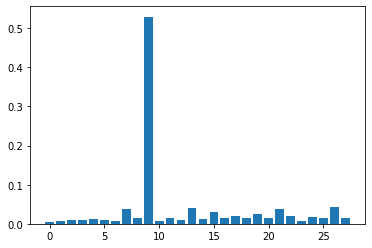

In [11]:
# summarize feature importance
importance = model_xgb.feature_importances_
for i,v in enumerate(importance):
    print(f'Feature {i}: {x_train.columns[i]}, Score: {round(v,5)}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()